In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib

In [4]:
np.random.seed(42)

# load dataset

In [7]:
data = pd.read_csv('/Users/hirunifernando/Desktop/tree_classifier_datasets.csv')

# separate features and labels

In [8]:
X = data[['length', 'width', 'ratio', 'petiole_length', 'angle']]

In [9]:
y = data['species']

# Encode labels as one-hot

In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the dataset into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model

In [108]:
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [109]:
import tensorflow as tf

In [110]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

In [111]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model

In [119]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/10
12/12 [==============================] - 0s 5ms/step - loss: 2.3273e-04 - accuracy: 1.0000 - val_loss: 5.8902e-04 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 2.2224e-04 - accuracy: 1.0000 - val_loss: 5.8089e-04 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 2.1026e-04 - accuracy: 1.0000 - val_loss: 5.7742e-04 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 0s 1ms/step - loss: 1.9944e-04 - accuracy: 1.0000 - val_loss: 5.6530e-04 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 1.9126e-04 - accuracy: 1.0000 - val_loss: 5.6144e-04 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 1ms/step - loss: 1.8255e-04 - accuracy: 1.0000 - val_loss: 5.4879e-04 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 1ms/step - loss: 1.7504e-04 - accuracy: 1.0000 - val_loss

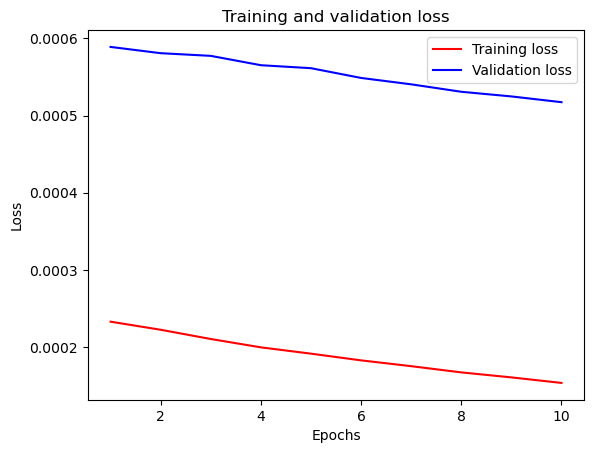

In [120]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

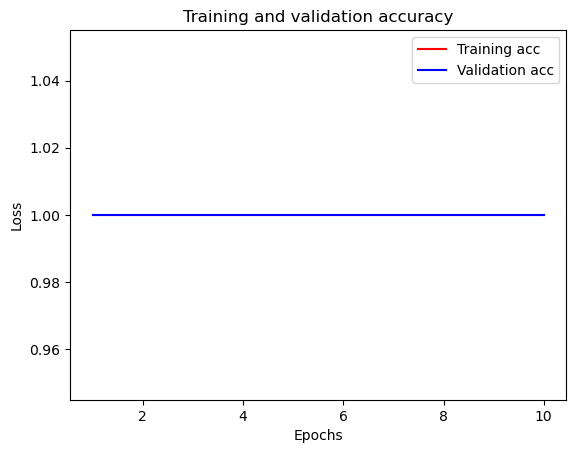

In [121]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# evaluate the model

In [122]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 111ms/step - loss: 5.1736e-04 - accuracy: 1.0000
Test Accuracy: 100.00%


In [123]:
X_scaled = scaler.transform(X)

# make predictions

In [124]:
predictions = model.predict(X_scaled)

5/5 [==============================] - 0s 624us/step


In [125]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_one_hot, axis=1)

In [126]:
predicted_species = label_encoder.inverse_transform(predicted_classes)
true_species = label_encoder.inverse_transform(true_classes)

In [127]:
results = pd.DataFrame({'True Species': true_species, 'Predicted Species': predicted_species})
print(results)

          True Species  Predicted Species
0    creamColour_ixora  creamColour_ixora
1    creamColour_ixora  creamColour_ixora
2    creamColour_ixora  creamColour_ixora
3    creamColour_ixora  creamColour_ixora
4    creamColour_ixora  creamColour_ixora
..                 ...                ...
145          jackfruit          jackfruit
146          jackfruit          jackfruit
147          jackfruit          jackfruit
148          jackfruit          jackfruit
149          jackfruit          jackfruit

[150 rows x 2 columns]


In [128]:
accuracy = np.mean(predicted_species == true_species)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

Prediction Accuracy: 100.00%


In [129]:
model.save('tree_species_classifier.h5')